## **Task_3**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Dataset  (1).csv')

In [4]:
print(df['Rating text'])

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object


## **Task: Restaurant Reviews**
#### **Analyze the text reviews to identify the most common positive and negative keywords.** ####

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
positive_data = df.loc[df['Aggregate rating']>=2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [7]:
positive_keywords = positive_data ['Rating text'].unique()
print(positive_keywords)

['Excellent' 'Very Good' 'Good' 'Average']


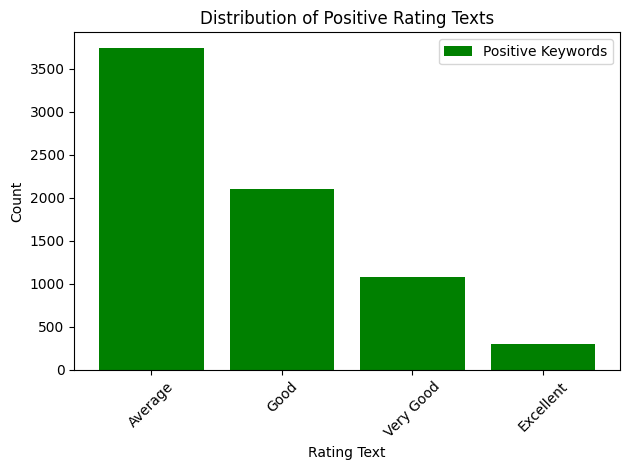

In [17]:
rating_counts = positive_data['Rating text'].value_counts()

# Plot bar chart
plt.bar(rating_counts.index, rating_counts.values, color='green', label='Positive Keywords')
plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.title('Distribution of Positive Rating Texts')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
negative_data = df.loc[(df['Aggregate rating']<2.5) & (df['Aggregate rating']>0)]
negative_keywords = negative_data['Rating text'].unique()
print(negative_keywords)

['Poor']


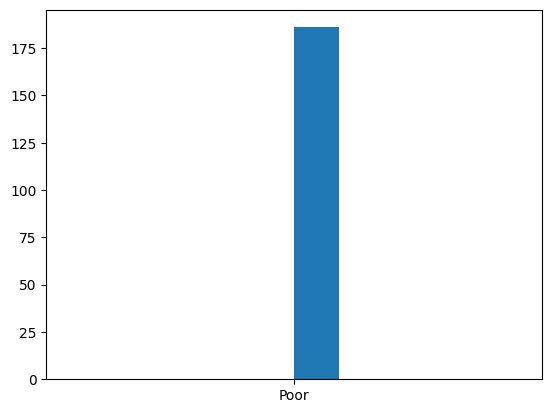

In [20]:
plt.hist(negative_data['Rating text'],label=negative_keywords)
plt.show()

## **Task-2**
**Task: Votes Analysis**

 Identify the restaurants with the highest and
 lowest number of votes

In [21]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [24]:
Highest_voted_resturant = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)
Highest_voted_resturant = Highest_voted_resturant.idxmax()
print('the Highest voted resturent is :',Highest_voted_resturant)

the Highest voted resturent is : Barbeque Nation


In [31]:
Lowest_voted_resturant = df.groupby('Restaurant Name')['Votes'].sum().sort_values()
Lowest_voted_resturant = Lowest_voted_resturant.idxmin()
print('the Lowest voted resturent is :',Lowest_voted_resturant)

the Lowest voted resturent is : Breaky2Dinner


 Analyze if there is a correlation between the
 number of votes and the rating of a
 restaurant.


In [34]:
corelation = np.corrcoef(df['Votes'],df['Aggregate rating'])
corelation = np.round(corelation,2)
print(corelation)

[[1.   0.31]
 [0.31 1.  ]]


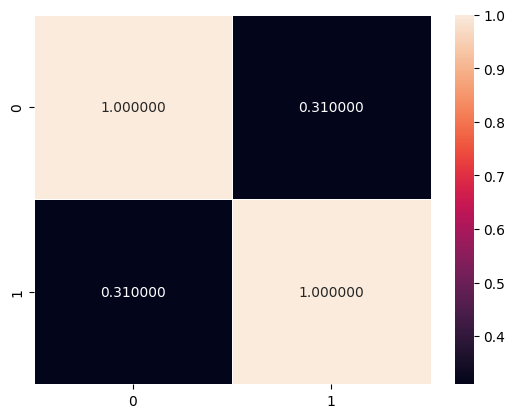

In [39]:
plt.Figure(figsize=(10,5),dpi = 100)
sns.heatmap(corelation,annot=True,fmt='2f',linewidths=.4)
plt.show()

In [41]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

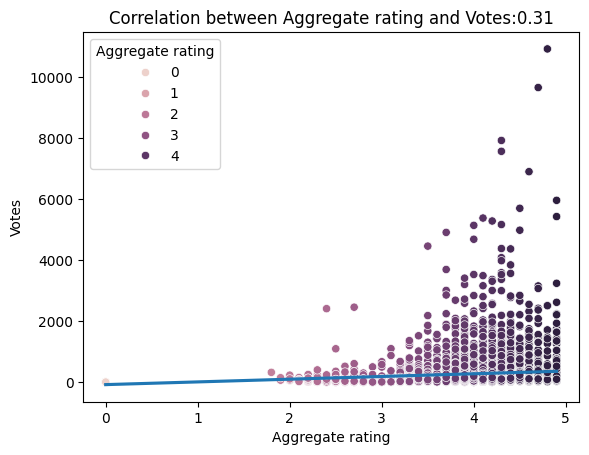

As per result corelation value = 0.31, which indicates there is a moderte position between these two variables.


In [46]:
sns.scatterplot(data=df,y = 'Votes',hue='Aggregate rating',x='Aggregate rating')
sns.regplot(data=df,x='Aggregate rating',y='Votes',scatter=False)
plt.title(f'Correlation between Aggregate rating and Votes:0.31')
plt.show()
print('As per result corelation value = 0.31, which indicates there is a moderte position between these two variables.')

## **Task-3**

### **Task: Price Range vs. Online Delivery and Table Booking**

Analyze if there is a relationship between the
 price range and the availability of online
 delivery and table booking

In [47]:
x1 = df['Has Online delivery']
y =df['Average Cost for two']
x2 =df['Has Table booking']

Plot 1 for Online Delivary with the avg cost

Plot 2 for table booking with the avg cost

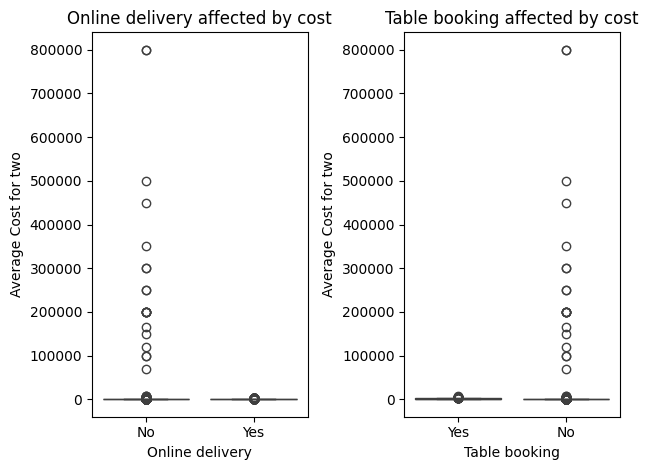

In [55]:
plt.Figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y=y)
plt.xlabel('Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Online delivery affected by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2,y=y)
plt.xlabel('Table booking')
plt.ylabel('Average Cost for two')
plt.title('Table booking affected by cost')
plt.tight_layout()
plt.show()

In [56]:
print('Both the online delivary and table booking are negetively impacted by the cost')

Both the online delivary and table booking are negetively impacted by the cost


Determine if higher-priced restaurants are   
 more likely to offer these services.

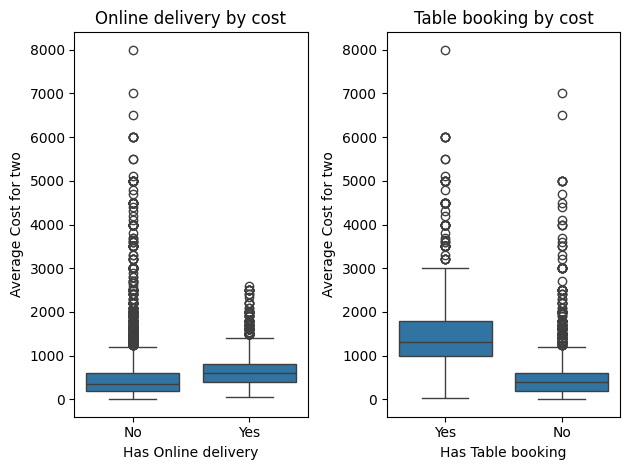

In [57]:
plt.Figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y='Average Cost for two',data=df.loc[df['Average Cost for two']<10000])
plt.title('Online delivery by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2, y='Average Cost for two',data=df.loc[df['Average Cost for two']<10000])
plt.title('Table booking by cost')
plt.tight_layout()
plt.show()

In [58]:
print('The Online delivery facility is persent for only those resturent, where the avg cost is less then 1000.')
print('The Table booking facility is available in restauratns with an average cost ranging from 1000 to 2000.')

The Online delivery facility is persent for only those resturent, where the avg cost is less then 1000.
The Table booking facility is available in restauratns with an average cost ranging from 1000 to 2000.
